In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('Placement_Data_full_Class.csv')

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
#1.Repalce the Nan values with correct value
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    float64
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(7), object(8)
memory usage: 25.6+ KB


In [5]:
dataset.isnull().sum()

sl_no              2
gender             2
ssc_p              2
ssc_b              2
hsc_p              2
hsc_b              2
hsc_s              2
degree_p           2
degree_t           2
workex             2
etest_p            2
specialisation     2
mba_p              2
status             2
salary            69
dtype: int64

In [6]:
Qual=[]
Quan=[]
for columnName in dataset.columns:
    #print(columnName)
    if(dataset[columnName].dtype=="O"):
        #print('Qual')
        Qual.append(columnName)
    else:
        #print('Quan')
        Quan.append(columnName)
    

In [7]:
Qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [8]:
Quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [9]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='median')
imp.fit(dataset[Quan])
df=imp.transform(dataset[Quan])
df=pd.DataFrame(df,columns=Quan)

In [10]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0
3,4.0,56.00,52.00,52.00,66.0,59.43,265000.0
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0


In [11]:
df.isnull().sum()

sl_no       0
ssc_p       0
hsc_p       0
degree_p    0
etest_p     0
mba_p       0
salary      0
dtype: int64

In [12]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp.fit(dataset[Qual])
df1=imp.transform(dataset[Qual])
df1=pd.DataFrame(df1,columns=Qual)

In [13]:
df1

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
212,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [14]:
df1.isnull().sum()

gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

#All columns in this dataset have two missing value but Salary have 69 missing value, and this dataset have also numerical data and categorical data,so i split it into Qual and Quan.  Qual nothing but cataegorical data and Quan is numerical. and i'm import  SimpleImputer form sklerarn and  using for strategy median because ,it's not take outliers and after that i check missing value convert to average value. and the Qual import same library but using for strategy most_frequent because this is the categorical data after the i check missing value convert to average value. 

In [15]:
marged=[df1,df]
preprocessed=pd.concat(marged, axis=1)
preprocessed

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed,1.0,67.00,91.00,58.00,55.0,58.80,270000.0
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed,2.0,79.33,78.33,77.48,86.5,66.28,200000.0
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed,3.0,65.00,68.00,64.00,75.0,57.80,250000.0
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed,4.0,56.00,52.00,52.00,66.0,59.43,265000.0
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,5.0,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,211.0,80.60,82.00,77.60,91.0,74.49,400000.0
213,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed,212.0,58.00,60.00,72.00,74.0,53.62,275000.0
214,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed,213.0,67.00,67.00,73.00,59.0,69.72,295000.0
215,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed,214.0,74.00,66.00,58.00,70.0,60.23,204000.0


In [16]:
# 2. How many of them are not placed?
preprocessed ['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [17]:
preprocessed['status'].value_counts()

status
Placed        150
Not Placed     67
Name: count, dtype: int64

# 67 students were not placed

In [18]:
#3. find the reason for non-placement form the datdset
#ans students who are not placed in the dataset have taken average or second class markes form ssc to Degree.

In [19]:
#4. what kind of rlation between Salary and Mba_p?
preprocessed.corr(numeric_only=True) 

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078154,-0.085705,-0.088280,0.063634,0.022327,0.047260
ssc_p,-0.078154,1.000000,0.511467,0.538409,0.262005,0.388484,0.108701
hsc_p,-0.085705,0.511467,1.000000,0.434228,0.245182,0.354848,0.123124
degree_p,-0.088280,0.538409,0.434228,1.000000,0.224499,0.402377,0.053437
etest_p,0.063634,0.262005,0.245182,0.224499,1.000000,0.218082,0.169353
mba_p,0.022327,0.388484,0.354848,0.402377,0.218082,1.000000,0.155732
salary,0.047260,0.108701,0.123124,0.053437,0.169353,0.155732,1.000000


#correlation of Salary and MBA relationship between nearly 15%of low degree of positive correlation

In [20]:
#5.which specialization is getting minimum salary?
preprocessed['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [21]:
preprocessed['specialisation'].value_counts()

specialisation
Mkt&Fin    122
Mkt&HR      95
Name: count, dtype: int64

In [22]:
preprocessed['salary'].min()

200000.0

In [23]:
preprocessed.pivot_table(index='specialisation',values='salary',aggfunc='min').reset_index()

,specialisation,salary
0,Mkt&Fin,200000.0
1,Mkt&HR,200000.0


#I think both specialisation(MK&HR, MK&Fin)got minimum salary

In [24]:
#6.how many of them getting above500000 salaries?

In [25]:
import seaborn as sns

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


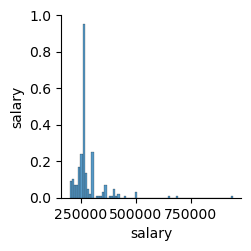

In [26]:
sns.pairplot(preprocessed[['salary']])

In [27]:
preprocessed['salary'].value_counts()

salary
265000.0    75
300000.0    22
250000.0    18
240000.0    15
260000.0     7
360000.0     6
200000.0     6
220000.0     5
275000.0     5
210000.0     4
400000.0     4
270000.0     4
216000.0     3
350000.0     3
500000.0     3
252000.0     2
236000.0     2
230000.0     2
280000.0     2
218000.0     2
204000.0     2
276000.0     2
255000.0     1
285000.0     1
340000.0     1
690000.0     1
233000.0     1
290000.0     1
650000.0     1
264000.0     1
225000.0     1
940000.0     1
393000.0     1
380000.0     1
420000.0     1
425000.0     1
336000.0     1
231000.0     1
268000.0     1
450000.0     1
287000.0     1
411000.0     1
320000.0     1
278000.0     1
295000.0     1
Name: count, dtype: int64

#6students got above 500000 salary in this dataset

In [28]:
#7 Test the Analysis of variance betwween etest_p and mba_p at signifance level 5%(Make decision using Hypothesis Testing)
import scipy.stats as stats

stats.f_oneway(preprocessed['etest_p'],preprocessed['mba_p'])

F_onewayResult(statistic=100.33226296639641, pvalue=2.2444909488516516e-21)

#Ho: There is no significant difference between the treatment\
Reject Null Hypothesis p<0.05, so that pvalue<0.02% Reject null Hypothesis and Accept Alternate hypothsis

In [29]:
#8. Test the similarity between the degree_t(Sci&Tech)and specialisation(Mkt&HR)with respect to salary at significance
#level of 5%(Makedecision using HypothesisiTesting)?
#independent sample-unpairesT-test(different Group(male,female)but same contion(salary))
from scipy.stats import ttest_ind
preprocessed=preprocessed.dropna()
SciTech = preprocessed[preprocessed['degree_t']=='Sci&Tech']['salary']
MktHR = preprocessed[preprocessed['specialisation']=='Mkt&HR']['salary']
ttest_ind(SciTech,MktHR)


TtestResult(statistic=3.053005553314895, pvalue=0.0026752836979138843, df=152.0)


#Reject Null Hypothesis p<0.05, so that pvalue<0.02% Reject null Hypothesis and Accept Alternate hypothsis


In [30]:
#9.convert the normal distribution to stqandard normaldistributionfor salary column?
#visual precentation
import seaborn as sns

C:\Users\Dell\AppData\Local\Temp\ipykernel_12032\1400738645.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed['salary'])


<Axes: xlabel='salary', ylabel='Density'>

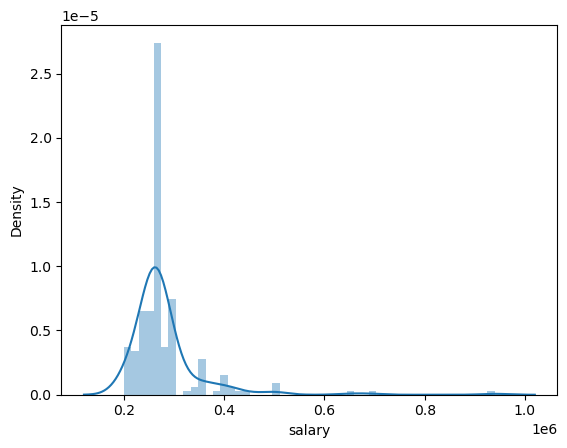

In [31]:
#Normal distribution
sns.distplot(preprocessed['salary'])

#Distplot access to X_Label=salary, Y_Lable=Density, density called as percentage value .i think more than students got placed for 200000 to 300000.

In [32]:
#Standard Normal Distribution
def stdNBgraph(preprocessed):
        # Coverted to standard Normal Distribution
    import seaborn as sns # it's one of the Datavisualization but has a high_ level interface
    mean=preprocessed.mean() # it's calculation for mean
    std=preprocessed.std() # it's calculation for std

    values=[i for i in preprocessed] # it's single line forloop

    z_score=[((j-mean)/std) for j in values] # it's calculation for Z_score

    sns.distplot(z_score,kde=True) #  Data visualization

    sum(z_score)/len(z_score) # avarage for dataset
    #z_score.std()


C:\Users\Dell\AppData\Local\Temp\ipykernel_12032\2811555720.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True) #  Data visualization


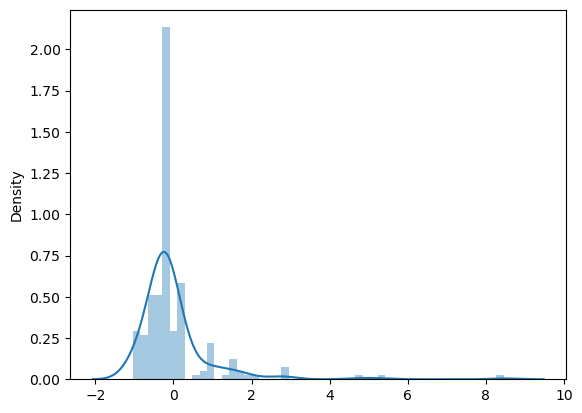

In [33]:
stdNBgraph(preprocessed["salary"])

#Standard Normal Distribution same to more than students got placed for 200000 to 300000.

In [34]:
#10. what is the probability Density function of the salary range from 700000 to900000?
#Normal Distribution
def get_pdf_probability(preprocessed,startrange,endrange):
    from matplotlib import pyplot #it's plotting library and using for Data visualization
    from scipy.stats import norm # it's using for scientific and technical computing.
    import seaborn as sns # it's one of the Datavisualization but has a high_ level interface
    ax = sns.distplot(preprocessed,kde=True,kde_kws={'color':'blue'},color='Green') # its give curve color and Histogram color
    pyplot.axvline(startrange,color='Red')# it's startrang red color for vertical line.
    pyplot.axvline(endrange,color='Red')#  it's endrange red color for vertical line.
    # generate a sample
    sample = preprocessed # sample data 
    # calculate parameters
    sample_mean =sample.mean() # it's calculation for mean
    sample_std = sample.std() #  it's calculation for std
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std) # it's save by variable 
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)] # it's single line forloop
    probabilities = [dist.pdf(value) for value in values]   #it's save by variable 
    prob=sum(probabilities) # it's calculation of avarage
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Dell\AppData\Local\Temp\ipykernel_12032\967020594.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(preprocessed,kde=True,kde_kws={'color':'blue'},color='Green') # its give curve color and Histogram color


Mean=281133.641, Standard Deviation=77885.098
The area between range(700000,900000):3.765944234744937e-08


3.765944234744937e-08

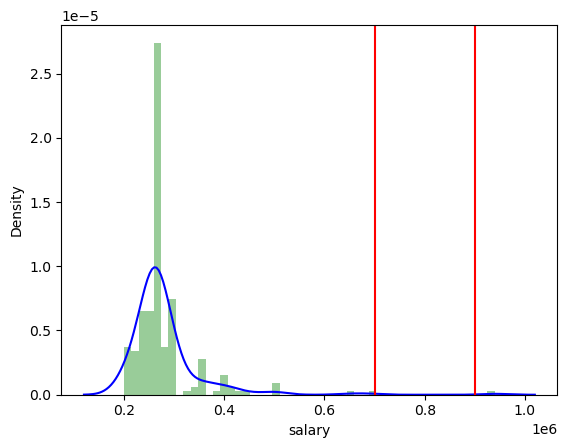

In [35]:
get_pdf_probability(preprocessed['salary'],700000,900000)

#I think one or two students got probability Density function of the salary range from 700000 to900000 

In [36]:
#11.Test the similarity between the degree_t(Sci&Tech)with respect to etest_o and mba_p qat significance level of 5%
      #(make decision using Hypothesis Testing)
#dependent sample_paried T_test(same Group(male)but different condition(ssc_p,hsc_p))
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
SciTech = preprocessed[preprocessed['degree_t']=='Sci&Tech']['etest_p']
SciTech1= preprocessed[preprocessed['degree_t']=='Sci&Tech']['mba_p']
#print(SciTech)
ttest_rel(SciTech,SciTech1)

TtestResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

#Reject Null Hypothesis p<0.05, but pvalue>5 so that Accept null Hypothesis and Reject Alternate hypothsis

In [37]:
#12.which parameters is highly correlated with salary?
preprocessed.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078154,-0.085705,-0.088280,0.063634,0.022327,0.047260
ssc_p,-0.078154,1.000000,0.511467,0.538409,0.262005,0.388484,0.108701
hsc_p,-0.085705,0.511467,1.000000,0.434228,0.245182,0.354848,0.123124
degree_p,-0.088280,0.538409,0.434228,1.000000,0.224499,0.402377,0.053437
etest_p,0.063634,0.262005,0.245182,0.224499,1.000000,0.218082,0.169353
mba_p,0.022327,0.388484,0.354848,0.402377,0.218082,1.000000,0.155732
salary,0.047260,0.108701,0.123124,0.053437,0.169353,0.155732,1.000000


#The parameter is highly correlated for etest_p with salary(0.16)

In [38]:
#13.Plot any useful graph and explain it?
import seaborn as sns

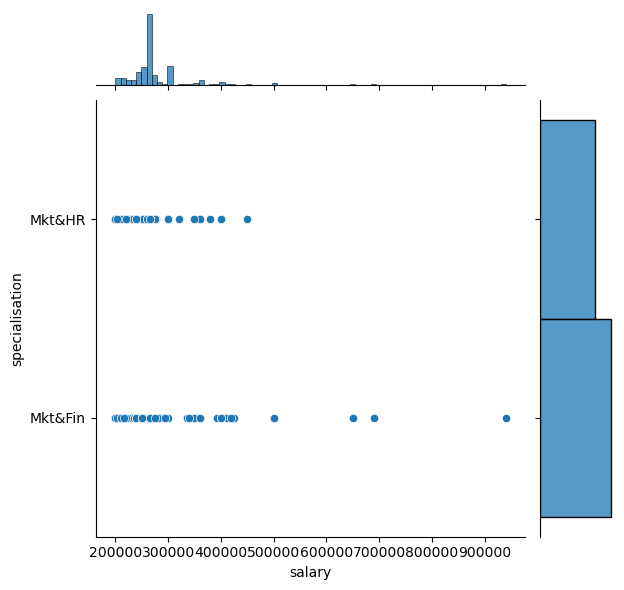

In [39]:
sns.jointplot(x='salary',y='specialisation',data=preprocessed)

#jointplot is  comparation for salary and specialisation(Mkt&Fin)got more than salary above 500000

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


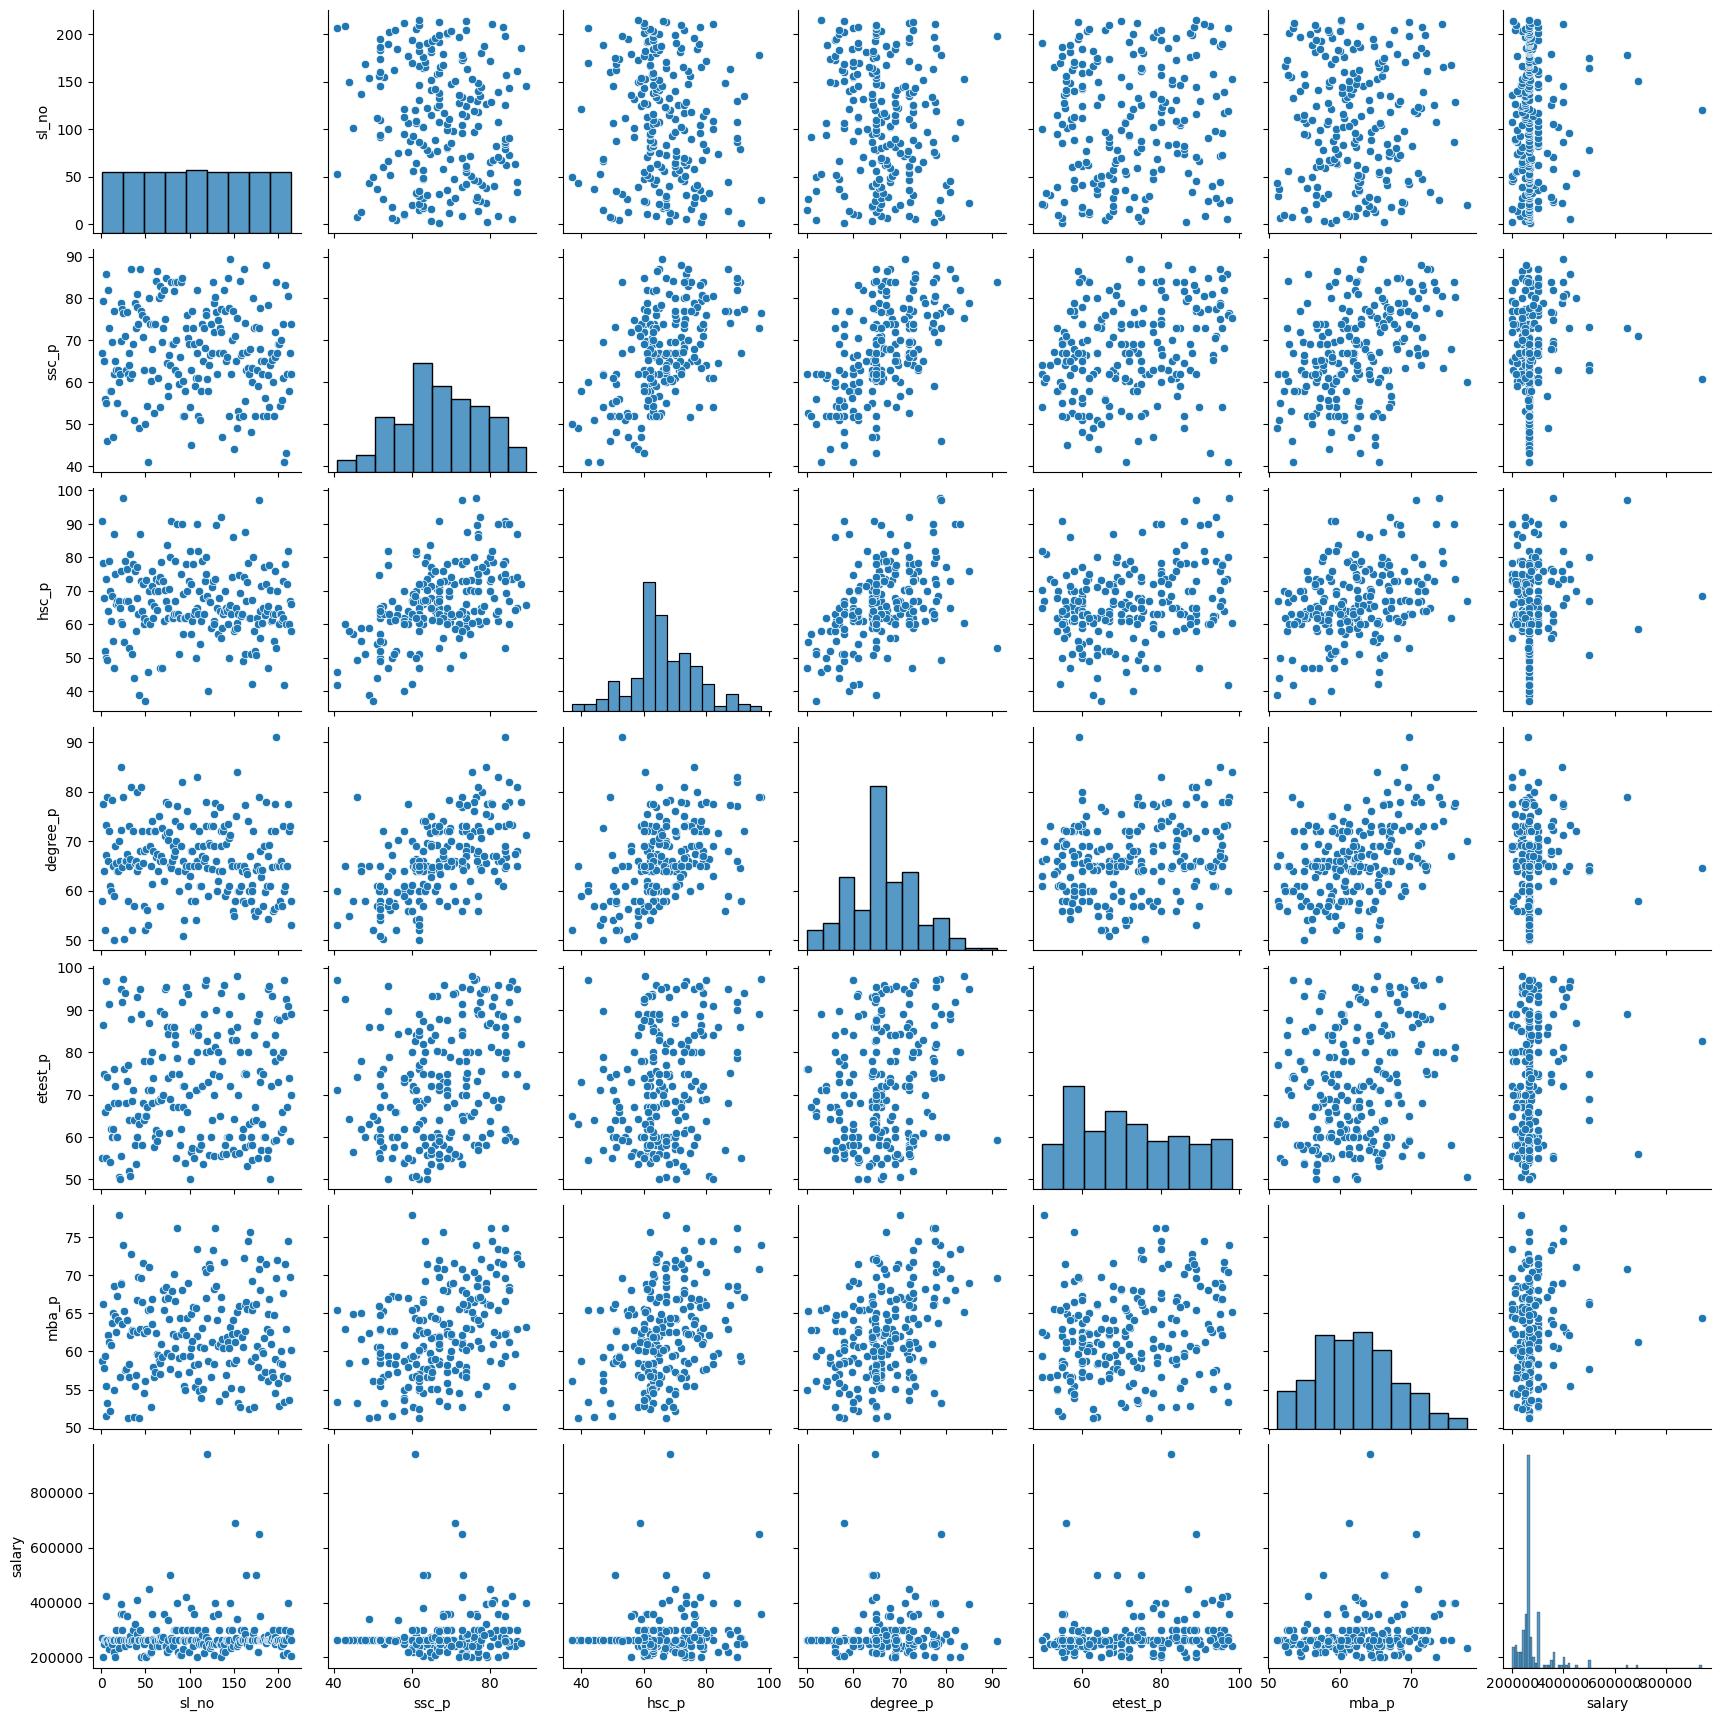

In [40]:
sns.pairplot(preprocessed)

#pairplot is compartion for hole dataset.for ex  most fo students got salary between rang and mba_p marks percentage and
degree_p,and all the feature compartion.this plot is overwhelming performances can be seen here.